In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('product_ratings-I.csv')

In [3]:
df

,ProductId,Rating,price
0,0205616461,1.7,293.0
1,0558925278,3.7,704.0
2,0558925278,1.3,223.0
3,0733001998,2.8,366.0
4,0737104473,4.6,976.0
...,...,...,...
995,978807894X,3.9,673.0
996,978807894X,1.7,293.0
997,978807894X,1.8,336.0
998,978807894X,3.9,735.0


In [4]:
missing_values_count = df.isna().sum()
print("\nNumber of missing values:")
print(missing_values_count)



Number of missing values:
ProductId      0
Rating         0
price        131
dtype: int64


In [5]:
rows_with_nan_price = df[df['price'].isna()]
rows_with_nan_price

,ProductId,Rating,price
9,130414643X,4.0,NaN
17,1304174778,0.9,NaN
19,1304174867,1.0,NaN
33,1304351475,4.3,NaN
35,1304351475,2.0,NaN
...,...,...,...
967,9788074421,2.0,NaN
980,9788075681,2.5,NaN
982,9788076025,2.0,NaN
990,9788078389,4.0,NaN


In [6]:
def fill_missing_price(df):
    for i in range(len(df)):
        if pd.isna(df.loc[i, 'price']):
            if i >= 4:
                mean_value = df['price'].iloc[i-4:i].mean()
            else:
                mean_value = df['price'].iloc[:i].mean()
            df.loc[i, 'price'] = mean_value
    return df

df_filled = fill_missing_price(df.copy())
df_filled

,ProductId,Rating,price
0,0205616461,1.7,293.0
1,0558925278,3.7,704.0
2,0558925278,1.3,223.0
3,0733001998,2.8,366.0
4,0737104473,4.6,976.0
...,...,...,...
995,978807894X,3.9,673.0
996,978807894X,1.7,293.0
997,978807894X,1.8,336.0
998,978807894X,3.9,735.0


In [7]:
average_rating = df.groupby('ProductId')['Rating'].mean().reset_index()
average_rating.columns = ['ProductId', 'average_rating']
average_rating.head()


,ProductId,average_rating
0,0205616461,1.7
1,0558925278,2.5
2,0733001998,2.8
3,0737104473,4.6
4,0762451459,1.1


In [8]:
number_of_ratings = df.groupby('ProductId')['Rating'].count().reset_index()
number_of_ratings.columns = ['ProductId', 'number_of_ratings']
number_of_ratings.head()

,ProductId,number_of_ratings
0,0205616461,1
1,0558925278,2
2,0733001998,1
3,0737104473,1
4,0762451459,1


In [9]:
ratings_summary = pd.merge(average_rating, number_of_ratings, on='ProductId')
ratings_summary.head()


,ProductId,average_rating,number_of_ratings
0,0205616461,1.7,1
1,0558925278,2.5,2
2,0733001998,2.8,1
3,0737104473,4.6,1
4,0762451459,1.1,1


In [10]:
top_10_popular_items = ratings_summary.sort_values(by='average_rating', ascending=False).head(10)
top_10_popular_items


,ProductId,average_rating,number_of_ratings
235,9788074367,4.90,1
140,9502737628,4.80,1
232,9788074049,4.80,1
167,9745343412,4.70,1
152,9601403825,4.65,2
58,1987958179,4.60,1
3,0737104473,4.60,1
182,9788071163,4.60,1
218,9788073247,4.60,1
241,9788075509,4.50,1


In [11]:
max_rating = df['Rating'].max()
max_rating

5.0

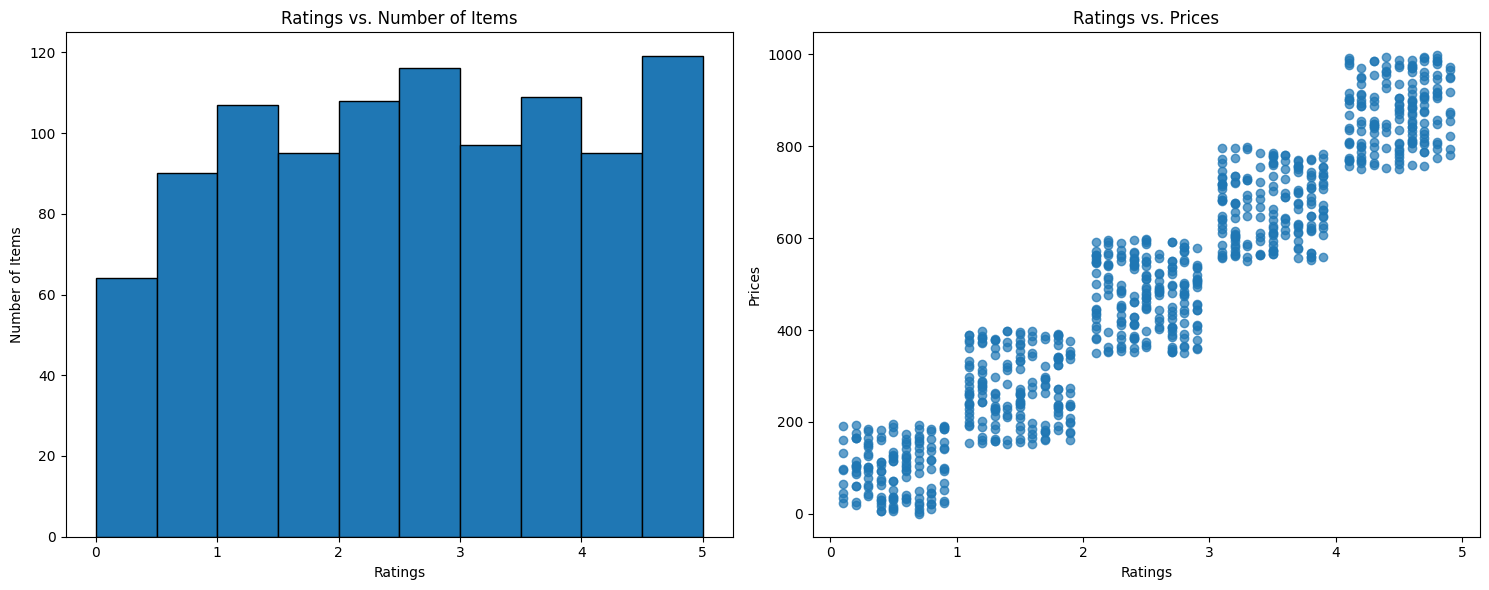

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].hist(df['Rating'], bins=np.arange(0, 5.5, 0.5), edgecolor='black')
ax[0].set_title('Ratings vs. Number of Items')
ax[0].set_xlabel('Ratings')
ax[0].set_ylabel('Number of Items')

ax[1].scatter(df['Rating'], df['price'], alpha=0.7)
ax[1].set_title('Ratings vs. Prices')
ax[1].set_xlabel('Ratings')
ax[1].set_ylabel('Prices')

plt.tight_layout()
plt.show()
